In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1b85b8','#ae5a41','#559e83','#c3cb71','#fb9062'])

Rin=1150
Rout=np.arange(0,51)
def Ratio(R):
    return Rin/(Rin+R)
print(Ratio(Rout))

[1.         0.99913119 0.99826389 0.99739809 0.9965338  0.995671
 0.99480969 0.99394987 0.99309154 0.99223469 0.99137931 0.99052541
 0.98967298 0.98882201 0.98797251 0.98712446 0.98627787 0.98543273
 0.98458904 0.98374679 0.98290598 0.98206661 0.98122867 0.98039216
 0.97955707 0.9787234  0.97789116 0.97706032 0.9762309  0.97540288
 0.97457627 0.97375106 0.97292724 0.97210482 0.97128378 0.97046414
 0.96964587 0.96882898 0.96801347 0.96719933 0.96638655 0.96557515
 0.9647651  0.96395641 0.96314908 0.9623431  0.96153846 0.96073517
 0.95993322 0.95913261 0.95833333]


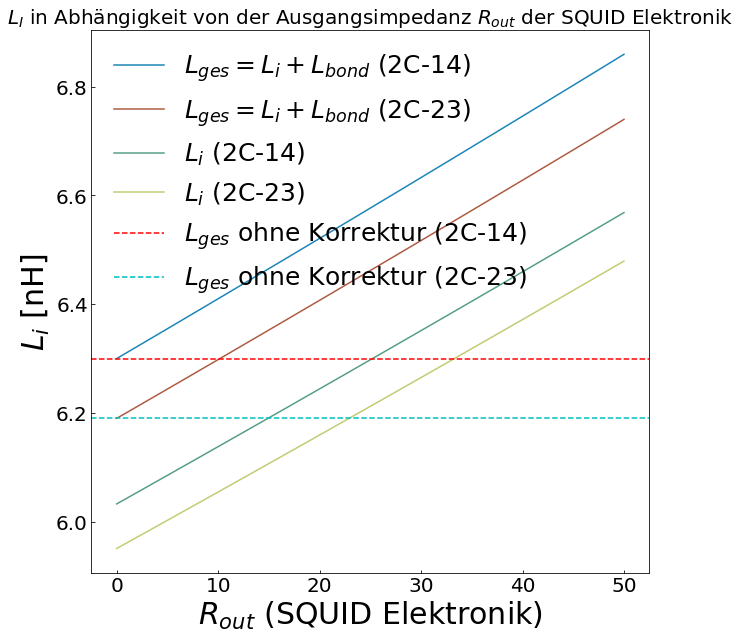

In [2]:
#TODO: Lpar der Zuleitungen abziehen!

RatioLR = Ratio(Rout)**2
Rbond_2c14 = 1.91/RatioLR
Rbond_2c23 = 1.71/RatioLR
Lbond_2c14 = 0.14*Rbond_2c14
Lbond_2c23 = 0.14*Rbond_2c23

plt.plot(Rout, 6.3/RatioLR, label='$L_{ges}=L_i+L_{bond}$ (2C-14)')
plt.plot(Rout, 6.19/RatioLR, label='$L_{ges}=L_i+L_{bond}$ (2C-23)')
plt.plot(Rout, (6.3/RatioLR)-Lbond_2c14, label='$L_i$ (2C-14)')
plt.plot(Rout, (6.19/RatioLR)-Lbond_2c23, label='$L_i$ (2C-23)')
plt.title('$L_I$ in Abhängigkeit von der Ausgangsimpedanz $R_{out}$ der SQUID Elektronik')
plt.xlabel('$R_{out}$ (SQUID Elektronik)')
plt.ylabel('$L_i$ [nH]')
#plt.axvline(x=6.781, label='$I_{b,max} = 6.781 \ \mu A$', ls='--', c='g')
plt.axhline(y=6.3, label='$L_{ges}$ ohne Korrektur (2C-14)', ls='--', c='r')
plt.axhline(y=6.19, label='$L_{ges}$ ohne Korrektur (2C-23)', ls='--', c='c')
plt.legend()
plt.savefig('Li_corr.pdf')

In [3]:
np.max((6.3/RatioLR)-Lbond_2c14), np.min((6.3/RatioLR)-Lbond_2c14)



(6.568577693761814, 6.0325999999999995)

In [4]:
Lbond_2c14[50]

0.2911576559546314

In [5]:
(6.3/RatioLR[50])

6.859735349716445

In [6]:
Li_2c14=(6.3/RatioLR[50])-Lbond_2c14[50]-0.123
Li_2c23=(6.19/RatioLR[50])-Lbond_2c23[50]-0.123
Li_2c14,Li_2c23, (Li_2c14+Li_2c23)/2

(6.445577693761813, 6.35629224952741, 6.400934971644611)

In [7]:
Rbond_2c14[50]

2.079697542533081

In [8]:
data1 = np.loadtxt('2C14_GBP4ghz_Rf30kohm_mf.dat',comments = '/*')
data2 = np.loadtxt('2C14_GBP4ghz_Rf30kohm_uhf.dat',comments = '/*')
data3 = np.loadtxt('Noise_fit.dat',comments = '/*')

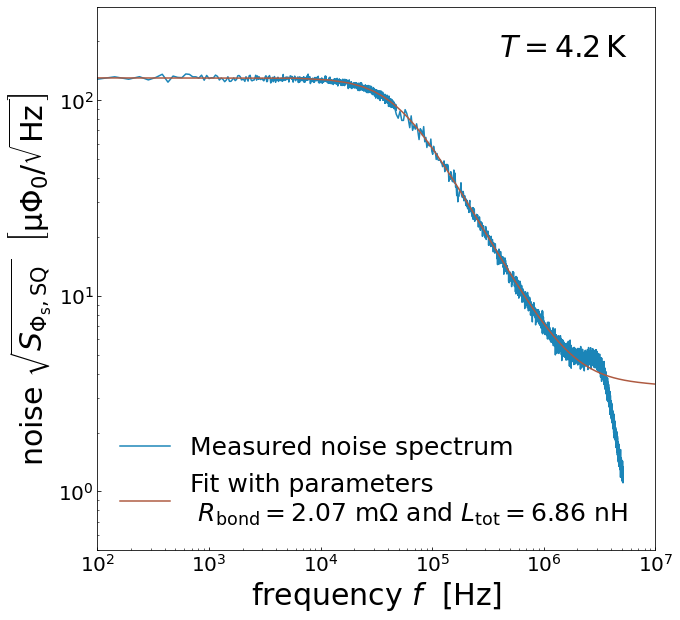

In [25]:
f, ax = plt.subplots()

plt.plot(data2.T[0][10:2700],data2.T[1][10:2700]*1e6,color= '#1b85b8',label='Measured noise spectrum')
plt.plot(data1.T[0][0:1000],data1.T[1][0:1000]*1e6,color= '#1b85b8')
plt.plot(data3.T[0],data3.T[1]*1.3,color = '#ae5a41', label='Fit with parameters \n $R_{\mathrm{bond}}=2.07$ $\mathrm{m\Omega}$ and $L_{\mathrm{tot}}=6.86 \  \mathrm{nH}$')
plt.xlim(1e2,1e7)
plt.ylim(0.5,3e2)
plt.xlabel(r'frequency $f \ \ \rm[Hz]$')
plt.ylabel(r'noise $\sqrt{S_{\rm \Phi_s,SQ}} \ \ \left[\rm \mu \Phi_{0}/\sqrt{Hz}\right]$')
plt.xscale('log')
plt.yscale('log')
#plt.text(0.42,0.95,'$L_\mathrm{i}$ measurement',ha='right', va='top', weight='bold', transform=ax.transAxes)
plt.text(0.95,0.95,'$T = 4.2\,\mathrm{K}$',ha='right', va='top', transform=ax.transAxes)
#plt.text(0.95,0.90,'2C-14',ha='right', va='top', color='grey',transform=ax.transAxes)
#plt.text(150,3,'2C14',color = 'tab:blue')
#plt.text(150,1.5,'Resistance $R = 2.07 \, \mathrm{m}\Omega$\nTotal inductance $L_\mathrm{tot} = 6.86 \, \mathrm{nH}$', color = 'tab:orange')
plt.legend(loc='lower left')
plt.savefig('Li_messung_2c14.pdf')
plt.show()

In [10]:
def Fitfunc(f):
    Phi0 = 2.07e-15
    input_sens = 3.47e-6
    kb = 1.38e-23
    T = 4.2
    R = 1.91e-3    #resistance of bonding wires in squid-input-circuit
    fLP = 100.0e6
    Mis_calc = 1/(input_sens)*Phi0
    L = 6.30e-9
    SQUID_white = 4e-6
    return np.sqrt((Mis_calc/Phi0)**2*((4*kb*T/R)/(1+(f/(R/(2*np.pi*L)))**2))+SQUID_white**2)*1/(1+(f/fLP)**2)*1e6


fit = Fitfunc(np.logspace(2,7,1000))

In [11]:
data1.T[1][10:2700][0:10]*1e6

array([130.717, 130.299, 136.098, 135.493, 131.594, 131.625, 129.612,
       134.222, 126.443, 133.8  ])